# Regresión

Vamos a trabajar con el dataset de paltas (*avocados*). Su descripción la pueden encontrar en https://www.kaggle.com/neuromusic/avocado-prices.

### 1. Carga de datos

a. Abrir el dataset (DS_Encuentro_19_Avocado.csv). Parsear fechas con la columna "Date".

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [38]:
palta = pd.read_csv('../datasets/DS_Encuentro_19_Avocado.csv', delimiter=',', parse_dates=['Date'])
palta.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


b. Eliminar la columna "Unnamed: 0".

In [39]:
palta.drop('Unnamed: 0', axis = 1, inplace = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


c. Ordenar el dataframe de manera creciente por fecha.

In [40]:
palta.sort_values('Date', inplace = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


d. Resetear los índices del Dataframe

In [41]:
palta.reset_index(inplace = True, drop  = True)
palta.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


### 2. Análisis exploratorio de datos

a. ¿Cuáles variables son numéricas y cuáles categóricas?¿Hay NaNs?

In [42]:
palta.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

b. ¿Cuántas regiones hay?¿Cuántas entradas por región?

In [43]:
# palta.groupby(['region']).count()
palta['region'].value_counts()

MiamiFtLauderdale      338
Southeast              338
NewYork                338
Detroit                338
Philadelphia           338
West                   338
Portland               338
Atlanta                338
Northeast              338
PhoenixTucson          338
Pittsburgh             338
Charlotte              338
Tampa                  338
StLouis                338
SouthCarolina          338
California             338
Spokane                338
Columbus               338
Plains                 338
Boston                 338
Chicago                338
SanDiego               338
Houston                338
LosAngeles             338
SouthCentral           338
GreatLakes             338
BaltimoreWashington    338
NorthernNewEngland     338
Louisville             338
Midsouth               338
CincinnatiDayton       338
GrandRapids            338
Albany                 338
HartfordSpringfield    338
Syracuse               338
Boise                  338
Orlando                338
D

c. Seleccionar solamente las instancias correspondientes a la region "Chicago".

In [44]:
palta_chicago = palta[palta['region'] == 'Chicago']
palta_chicago.reset_index(inplace = True, drop = True)
palta_chicago.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,2015-01-11,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,2015-01-11,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,2015-01-18,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


d. ¿Cómo son los precios de las paltas en función de las distintas variables?

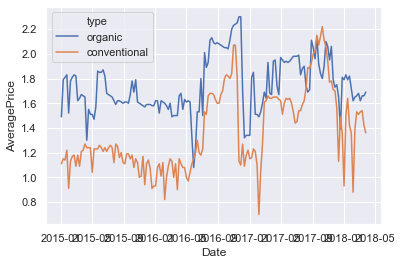

In [45]:
# sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago)
sns.lineplot(x = 'Date', y = 'AveragePrice', data = palta_chicago, hue = 'type')

**Probar con otras variables**

In [46]:
# sns.lineplot(x = 'Date', y = 'Total Bags', data = palta_chicago, hue = 'type') # No relacion lineal
# sns.lineplot(x = 'Date', y = 'Total Volume', data = palta_chicago, hue = 'type') # No relacion lineal
# sns.lineplot(x = 'Date', y = 'Total Volume', data = palta_chicago, hue = 'type') # No relacion lineal
# o usar las funciones que prefieran

#### Pasar fechas a números

A veces, en lugar de trabajar con fechas, es más fácil pasarlas a un número representativo. La siguiente celda se encarga de eso.

In [47]:
import datetime as dt
palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)
palta_chicago.head()

<ipython-input-47-98e6e1713964>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palta_chicago['Date']=palta_chicago['Date'].map(dt.datetime.toordinal)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,735602,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
2,735609,1.79,12915.74,1426.75,10900.10,0.00,588.89,588.89,0.00,0.00,organic,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago


### 3. Modelos de regresión

#### Regresión Lineal 1D

Vamos a entrenar un modelo de regresión lineal entre la fecha y el precio promedio de las paltas convencionales.

In [48]:
palta_chicago_convencional = palta_chicago[palta_chicago.type == 'conventional']
palta_chicago_convencional.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,735602,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
3,735609,1.15,802874.94,31239.94,558487.79,133848.57,79298.64,74716.43,4539.25,42.96,conventional,2015,Chicago
4,735616,1.14,797741.43,24917.77,533717.99,140239.95,98865.72,95516.44,3311.71,37.57,conventional,2015,Chicago
6,735623,1.22,745439.17,26117.56,488218.44,145882.24,85220.93,75867.61,9265.81,87.51,conventional,2015,Chicago
8,735630,0.91,1133491.66,50783.91,824745.44,164884.41,93077.90,89516.93,3448.62,112.35,conventional,2015,Chicago


a. Separamos las variables independientes ('Date') y dependientes ('AveragePrice'). Para trabajar con las fechas, la pasamos a números.

In [49]:
X = palta_chicago_convencional.Date.values
X2 = palta_chicago_convencional.Date.values
y = palta_chicago_convencional.AveragePrice.values
print(X.shape, y.shape)

(169,) (169,)


Hacemos un reshape para X. ¿Por qué?

In [50]:
X = X.reshape(-1,1)
print(X.shape)

(169, 1)


b. Separamos en train/test

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(126, 1)
(43, 1)
(126,)
(43,)


c. Implementamos y entrenamos el modelo de regresión lineal

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

¿Qué aprendió?

In [53]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)


[0.00058427]
-428.76320926945476
1


Predecimos sobre los datos de train y de test.

In [54]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train,y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.06791505787586333
Error en datos de test: 0.06842314378312596


Graficamos

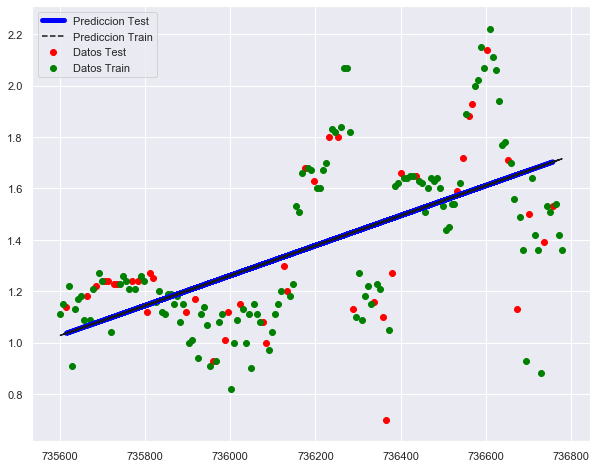

In [55]:
plt.figure(figsize = (10,8))

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.legend()
plt.show()


#### KNN y Árboles

1. Entrenar un modelo de árbol de regresión y un modelo de KNN de regresión, primero usando las mismas variables que para la regresión lineal y después agregando más. Por ejemplo, ¿qué pasa si agregamos la variable "type"?¿Cómo trabajan estos modelos con variables categóricas?
2. Evaluar los desempeños de cada modelo. ¿Qué métricas usarían?¿Hay grandes diferencias?

In [56]:
from sklearn.tree import DecisionTreeRegressor
# Creamos un objeto arbol
tree = DecisionTreeRegressor(max_depth=5)

In [57]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
from sklearn.metrics import mean_squared_error

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train,y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.005527337175610983
Error en datos de test: 0.03606929186881472


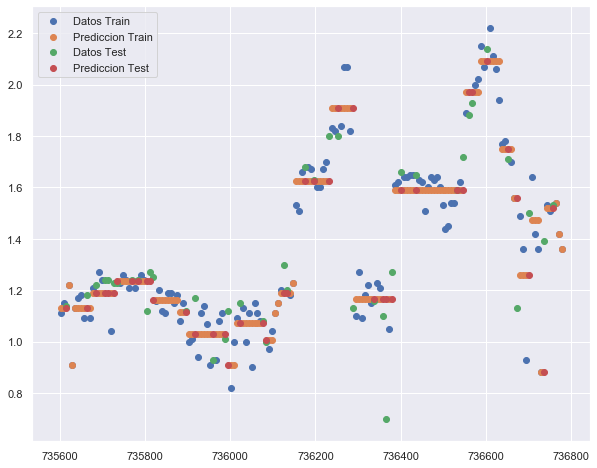

In [59]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train, label = 'Datos Train')
plt.scatter(X_train, y_train_pred, label = 'Prediccion Train')

plt.scatter(X_test, y_test, label = 'Datos Test')
plt.scatter(X_test, y_test_pred, label = 'Prediccion Test')

plt.legend()
plt.show()

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
palta['type'] = le.fit_transform(palta["type"])

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

neigh = KNeighborsClassifier(n_neighbors=4)

X = palta[['AveragePrice','type']]
y = palta.Date

#X_train, X_test,y_train, y_test = train_test_split(X, y,test_size= 0.1, random_state=True)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size= 0.1, random_state=True, stratify=y)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
#X_train, X_test,y_train, y_test = train_test_split(X, y,test_size= 0.1, random_state=True)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aceirtos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aceirtos sobre el set de evaluación:',test_acc)

Porcentaje de aceirtos sobre el set de entrenamiento: 0.031600097418412076
Porcentaje de aceirtos sobre el set de evaluación: 0.00821917808219178


In [66]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 50
rgr_knn = KNeighborsRegressor(n_neighbors = n_neighbors)
rgr_knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                    weights='uniform')

In [67]:
y_train_pred_knn = rgr_knn.predict(X_train)
y_test_pred_knn = rgr_knn.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred_knn))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred_knn))

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')